In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

print(tf.config.list_physical_devices('GPU'))

2024-01-27 22:00:33.958656: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-01-27 22:00:35.128421: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-01-27 22:00:35.128997: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-01-27 22:00:35.141913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-27 22:00:35.142067: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 Ti computeCapability: 7.5
coreClock: 1.485GHz coreCount: 16 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2024-01-27 22:00:35.142088: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-01-27 22:00:35.143530: I tensorflow/stream_executor/platform

In [2]:
import numpy as np
import pandas as pd

In [3]:
from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = columns

/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/inD/x_y_recording_00_range_384.csv
/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/scenario_samples/lane_merging/dif_set/test_set_00.csv


In [5]:
# Target vector y
y = np.concatenate([a_x[0:-2], a_y[0:-2]])    # a(k)
y.shape

dt = 0.04
dt_2 = dt ** 2 / 2 
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:

dt = 0.04
A =  s_x[2:] - s_x[1:-1] - a_x[1:-1]  - dt*v_x[0:-2]
E =  s_y[2:] - s_y[1:-1] - a_y[1:-1]  - dt* v_y[0:-2]              

B = - a_x[2:] - dt * v_x[1:-1] 
F = - a_y[2:] - dt * v_y[1:-1]

C = - s_x[1:-1]- a_x[2:] 
G = - s_y[1:-1]- a_y[2:]                 




X_a = np.vstack((
    np.column_stack((A, B, C)), 
    np.column_stack((E, F, G))
    ))
X_a.shape


(410546, 3)

In [21]:
# Define your neural network architecture with increased complexity
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(128, activation='relu'),  # Additional dense layer with more neurons
    layers.Dense(64, activation='relu'),   # Additional dense layer with more neurons
    layers.Dense(32, activation='relu'),   # Additional dense layer with more neurons
    layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [22]:



# Preprocess your data
# Assuming X_a is your input data and y is your target vector

# Split your data into training and validation sets
split_ratio = 0.8
split_index = int(split_ratio * len(X_a))

X_train, X_val = X_a[:split_index], X_a[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model
test_loss = model.evaluate(X_val, y_val)

# Make predictions
predictions = model.predict(X_val)

Epoch 1/10
10264/10264 [==============================] - 12s 1ms/step - loss: 0.0570 - val_loss: 0.0044
Epoch 2/10
10264/10264 [==============================] - 11s 1ms/step - loss: 0.0066 - val_loss: 0.0032
Epoch 3/10
10264/10264 [==============================] - 11s 1ms/step - loss: 0.0048 - val_loss: 0.0029
Epoch 4/10
10264/10264 [==============================] - 12s 1ms/step - loss: 0.0044 - val_loss: 0.0030
Epoch 5/10
10264/10264 [==============================] - 11s 1ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 6/10
10264/10264 [==============================] - 12s 1ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 7/10
10264/10264 [==============================] - 12s 1ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 8/10
10264/10264 [==============================] - 11s 1ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 9/10
10264/10264 [==============================] - 11s 1ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 10/10
2566/2566 [==============================] 

In [23]:
test_loss = model.evaluate(X_val, y_val)
test_loss

2566/2566 [==============================] - 1s 569us/step - loss: 0.0028


0.002794879022985697

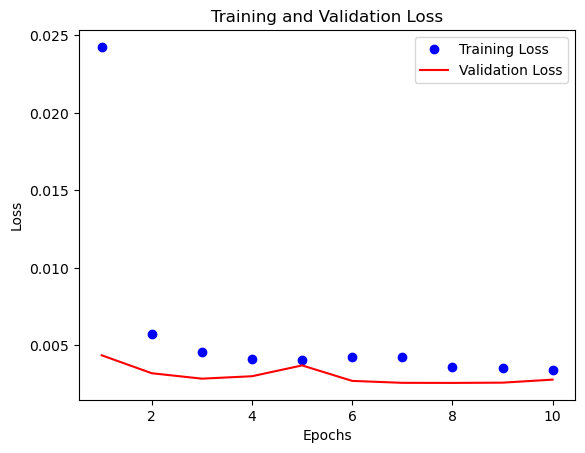

In [24]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


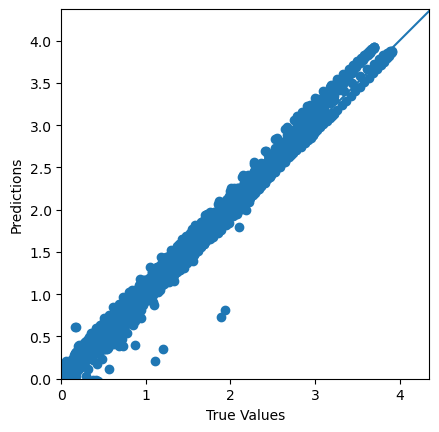

In [25]:
plt.scatter(y_val, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()


In [26]:

from src.data_processing.create_vis_data import s_x, s_y, v_x, v_y, a_x, a_y 

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/inD/data/00_tracks.csv'

In [27]:
# Target vector y
y_new = np.concatenate([a_x[0:-2], a_y[0:-2]])    # a(k)

dt = 0.04
dt_2 = dt ** 2 / 2 
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:

dt = 0.04
A =  s_x[2:] - s_x[1:-1] - a_x[1:-1]  - dt*v_x[0:-2]
E =  s_y[2:] - s_y[1:-1] - a_y[1:-1]  - dt* v_y[0:-2]              

B = - a_x[2:] - dt * v_x[1:-1] 
F = - a_y[2:] - dt * v_y[1:-1]

C = - s_x[1:-1]- a_x[2:] 
G = - s_y[1:-1]- a_y[2:]                 




X_new = np.vstack((
    np.column_stack((A, B, C)), 
    np.column_stack((E, F, G))
    ))


In [28]:
predictions_new = model.predict(X_new)

In [29]:
new_data_loss = model.evaluate(X_new, y_new)

12830/12830 [==============================] - 8s 598us/step - loss: 0.0032


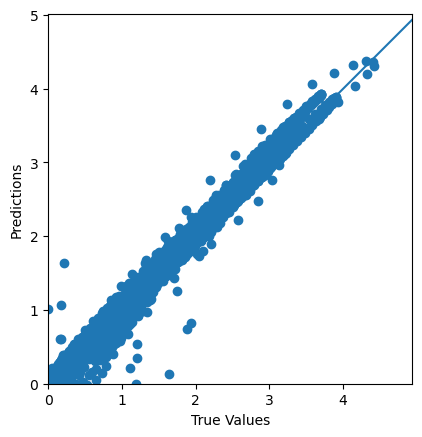

In [30]:
plt.scatter(y_new, predictions_new)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()


In [31]:
errors = predictions_new - y_new
plt.hist(errors, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()


MemoryError: Unable to allocate 1.23 TiB for an array with shape (410546, 410546) and data type float64

In [33]:
from sklearn.metrics import mean_squared_error

# Assuming y_new is the ground truth for your new dataset
mse_new = mean_squared_error(y_new, predictions_new)
print("Mean Squared Error on New Dataset:", mse_new)


Mean Squared Error on New Dataset: 0.0032297819430030165
